In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

In [38]:
train_data_path = '/Volumes/out_disk/datasets/RAF-DB/data/raf_train.csv'
test_data_path = '/Volumes/out_disk/datasets/RAF-DB/data/raf_test.csv'


# train_data_path = '/root/autodl-tmp/RAF-DB/data/raf_train.csv'
# test_data_path = '/root/autodl-tmp/RAF-DB/data/raf_test.csv'

In [39]:
train_data = pd.read_csv(train_data_path)
data = train_data[['valence', 'arousal']].to_numpy()
label = train_data['expression'].to_numpy()

In [40]:
print(type(data))
print(len(data))
print(data)
print(type(label))
print(len(label))
print(label)

<class 'numpy.ndarray'>
12271
[[-0.34206045 -0.05062347]
 [-0.4201072  -0.17005987]
 [ 0.5273902  -0.05766526]
 ...
 [-0.0877724  -0.01207203]
 [-0.39404577  0.54311913]
 [-0.06422256  0.00758263]]
<class 'numpy.ndarray'>
12271
[2 2 1 ... 0 0 0]


In [41]:
ts = TSNE(n_components=2, init='pca', random_state=0)


In [42]:
# t-SNE降维
reslut = ts.fit_transform(data)

/Users/lizhuan/opt/anaconda3/envs/paper/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/lizhuan/opt/anaconda3/envs/paper/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


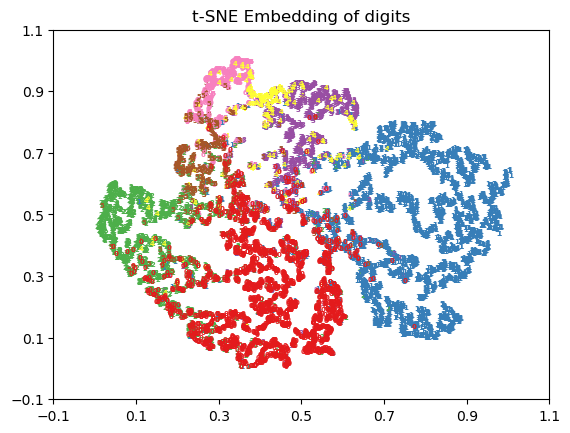

In [55]:
# 对样本进行预处理并画图
def plot_embedding(data, label, title):
	"""
	:param data:数据集
	:param label:样本标签
	:param title:图像标题
	:return:图像
	"""
	x_min, x_max = np.min(data, 0), np.max(data, 0)
	data = (data - x_min) / (x_max - x_min)		# 对数据进行归一化处理
	fig = plt.figure()		# 创建图形实例
	ax = plt.subplot(111)		# 创建子图
	# 遍历所有样本
	for i in range(data.shape[0]):
		# 在图中为每个数据点画出标签
		plt.text(data[i, 0], data[i, 1], str(label[i]), color=plt.cm.Set1(label[i] / 7),
				 fontdict={'weight': 'bold', 'size': 5})
	plt.xticks([-0.1,0.1,0.3,0.5,0.7,0.9,1.1])		# 指定坐标的刻度
	plt.yticks([-0.1,0.1,0.3,0.5,0.7,0.9,1.1])
	plt.title(title, fontsize=12)
	# 返回值
	return fig
# 调用函数，绘制图像
fig = plot_embedding(reslut, label, 't-SNE Embedding of digits')
# 显示图像
plt.show()